In [152]:
import pandas as pd
import numpy as np

In [153]:
#reading the csv file and printing its shape
df = pd.read_csv('loan.csv',low_memory=False)
df.shape

(39717, 111)

In [154]:
# df.head()
# pd.options.display.min_rows = 1115

In [155]:
# col names where lot of null values
df.isnull().sum()[df.isnull().sum() > 39000]

mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717
acc_open_past_24mths              39717
avg_cur_bal                       39717
bc_open_to_buy                    39717
bc_util                           39717


In [156]:
# dropping the columms where lot of values are null 
s = df.isnull().sum()[df.isnull().sum() > 39000]
for i,x in s.items():
    print('dropped :',i)
    df.drop(i,axis='columns', inplace=True)


dropped : mths_since_last_major_derog
dropped : annual_inc_joint
dropped : dti_joint
dropped : verification_status_joint
dropped : tot_coll_amt
dropped : tot_cur_bal
dropped : open_acc_6m
dropped : open_il_6m
dropped : open_il_12m
dropped : open_il_24m
dropped : mths_since_rcnt_il
dropped : total_bal_il
dropped : il_util
dropped : open_rv_12m
dropped : open_rv_24m
dropped : max_bal_bc
dropped : all_util
dropped : total_rev_hi_lim
dropped : inq_fi
dropped : total_cu_tl
dropped : inq_last_12m
dropped : acc_open_past_24mths
dropped : avg_cur_bal
dropped : bc_open_to_buy
dropped : bc_util
dropped : mo_sin_old_il_acct
dropped : mo_sin_old_rev_tl_op
dropped : mo_sin_rcnt_rev_tl_op
dropped : mo_sin_rcnt_tl
dropped : mort_acc
dropped : mths_since_recent_bc
dropped : mths_since_recent_bc_dlq
dropped : mths_since_recent_inq
dropped : mths_since_recent_revol_delinq
dropped : num_accts_ever_120_pd
dropped : num_actv_bc_tl
dropped : num_actv_rev_tl
dropped : num_bc_sats
dropped : num_bc_tl
dropped 

In [157]:
df.shape

(39717, 57)

In [158]:
# Dropping rows where loan is still in progress
#df['loan_status'].value_counts()
df = df[df['loan_status'] != 'Charged Off']

In [159]:
df.shape

(34090, 57)

In [160]:
# Figuring out values which could be imputed/rectified in the remaining dataset
df.isnull().sum()[df.isnull().sum()>0]

emp_title                      1975
emp_length                      847
desc                          11138
title                             9
mths_since_last_delinq        22197
mths_since_last_record        31882
revol_util                       34
next_pymnt_d                  32950
last_credit_pull_d                1
collections_12_mths_ex_med       50
chargeoff_within_12_mths         50
pub_rec_bankruptcies            579
tax_liens                        38
dtype: int64

In [161]:
# Analysing each table using value_counts i found: 
# these can be used after modification - emp_length, revol_util, last_credit_pull_d, pub_rec_bankruptcies

# cannot be used 
# emp_title dropping as it has a lot of uniqe values
# desc dropping this has no standard format and 12k values missing
# title dropping as it has same data as 'purpose'
# mths_since_last_delinq dropped too large values missing
# mths_since_last_record dropped too large values missing
# next_pymnt_d dropped due to very large values missing
# last_pymnt_d dropped too large values missing
# collections_12_mths_ex_med all values are 0
# chargeoff_within_12_mths all values are 0
# tax_liens all values are 0

# Execute command for each like :
df.emp_length.value_counts()

10+ years    7548
< 1 year     3944
2 years      3821
3 years      3540
4 years      2974
5 years      2824
1 year       2784
6 years      1922
7 years      1510
8 years      1276
9 years      1100
Name: emp_length, dtype: int64

In [162]:
#dropping multiple columns
df.drop(['emp_title','desc','title','mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis='columns',inplace=True)
df.drop(['last_pymnt_d','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'],axis='columns',inplace=True)


In [163]:
df.shape
df.isnull().sum()[df.isnull().sum()>0]

emp_length              847
revol_util               34
last_credit_pull_d        1
pub_rec_bankruptcies    579
dtype: int64

In [164]:
# imputing the most common value in last_credit_pull_d which is 'May-16'
df.last_credit_pull_d.value_counts()
df.last_credit_pull_d.fillna('May-16',inplace=True) 

In [165]:
# imputing the most common value in revol_util which is '0%'
df.revol_util.value_counts()
df.revol_util.fillna('0%',inplace=True)

In [166]:
df.pub_rec_bankruptcies.value_counts()
df.pub_rec_bankruptcies.fillna(0.0,inplace=True)

In [167]:
df.emp_length.value_counts()
# df.emp_length[df.emp_length.isnull()]
# df.emp_length.fillna('10+ years',inplace=True)

10+ years    7548
< 1 year     3944
2 years      3821
3 years      3540
4 years      2974
5 years      2824
1 year       2784
6 years      1922
7 years      1510
8 years      1276
9 years      1100
Name: emp_length, dtype: int64

In [168]:
#dividing into percentage 
emp_len_series = round(df.emp_length.value_counts()/df.emp_length.value_counts().sum()*100)

In [169]:
random_emp_length =[]
for key,value in emp_len_series.items():
    print(key,value)
    random_emp_length.append(key)
# random_emp_length

10+ years 23.0
< 1 year 12.0
2 years 11.0
3 years 11.0
4 years 9.0
5 years 8.0
1 year 8.0
6 years 6.0
7 years 5.0
8 years 4.0
9 years 3.0


In [170]:
probability = list(df.emp_length.value_counts(normalize=True).values)
df.emp_length = df.emp_length.apply(lambda x: np.random.choice(random_emp_length, 1, replace=False, p=probability)[0] if pd.isna(x) else x)


In [171]:
df.emp_length.value_counts()

10+ years    7742
< 1 year     4040
2 years      3917
3 years      3630
4 years      3050
5 years      2892
1 year       2858
6 years      1974
7 years      1549
8 years      1311
9 years      1127
Name: emp_length, dtype: int64

In [172]:
df.shape

(34090, 47)

In [173]:
#drop columns based on analysis of data in remaining 49 columns 

# id	ID number unique - no usage
# member_id	ID number unique - no usage
# pymnt_plan	Drop same value
# url	Drop - url of loan application not useful
# initial_list_status  Drop, same value for all
# out_prncp	drop 38k zero
# out_prncp_inv	drop 38k zero
# total_pymnt	drop too much varition
# total_pymnt_inv	drop too much varition
# total_rec_int	drop too much varition
# policy_code	drop no vairation			
# application_type	drop no vairation			
# acc_now_delinq	drop no vairation			
# delinq_amnt	drop no vairation		
# last_pymnt_amnt dropping as lot of varation 34k not sure if can be derived


In [174]:
df.drop(['id','member_id','pymnt_plan','url','initial_list_status','out_prncp','out_prncp_inv'],axis='columns',inplace=True)

In [175]:
df.drop(['total_pymnt','total_pymnt_inv','total_rec_int','policy_code','application_type','acc_now_delinq','delinq_amnt','last_pymnt_amnt'],axis='columns',inplace=True)

In [176]:
df.shape
# 32 colums remaining for analysis 

(34090, 32)

In [192]:
%pip install seaborn

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

In [194]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,pub_rec,revol_bal,revol_util,total_acc,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,0,13648,83.70%,9,5000.0,0.0,0.0,0.0,May-16,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,0,2956,98.50%,10,2400.0,0.0,0.0,0.0,May-16,0.0


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34090 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                34090 non-null  int64  
 1   funded_amnt              34090 non-null  int64  
 2   funded_amnt_inv          34090 non-null  float64
 3   term                     34090 non-null  object 
 4   int_rate                 34090 non-null  object 
 5   installment              34090 non-null  float64
 6   grade                    34090 non-null  object 
 7   sub_grade                34090 non-null  object 
 8   emp_length               34090 non-null  object 
 9   home_ownership           34090 non-null  object 
 10  annual_inc               34090 non-null  float64
 11  verification_status      34090 non-null  object 
 12  issue_d                  34090 non-null  object 
 13  loan_status              34090 non-null  object 
 14  purpose               

In [206]:
cat_col=['addr_state','purpose','loan_status','issue_d','verification_status']
num_col=['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec_bankruptcies','pub_rec','revol_bal','total_acc','total_rec_prncp']
# ext_col=['instant']

In [197]:
df.nunique()

loan_amnt                    854
funded_amnt                 1007
funded_amnt_inv             6968
term                           2
int_rate                     362
installment                13732
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 5
annual_inc                  4727
verification_status            3
issue_d                       55
loan_status                    2
purpose                       14
zip_code                     815
addr_state                    50
dti                         2843
delinq_2yrs                   11
earliest_cr_line             522
inq_last_6mths                 9
open_acc                      39
pub_rec                        5
revol_bal                  19833
revol_util                  1078
total_acc                     80
total_rec_prncp             2443
total_rec_late_fee           533
recoveries                     1
collection_recovery_fee        1
last_credi

loan_amnt


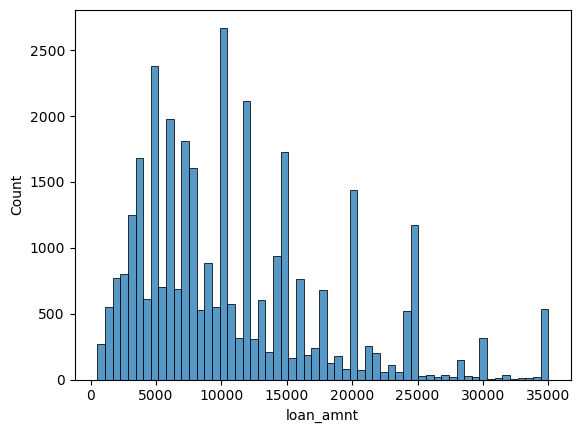

funded_amnt


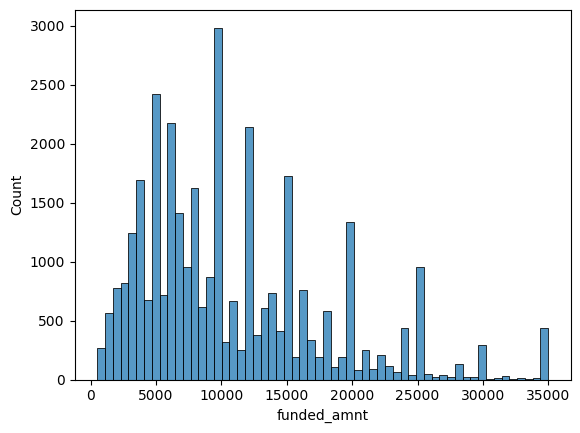

funded_amnt_inv


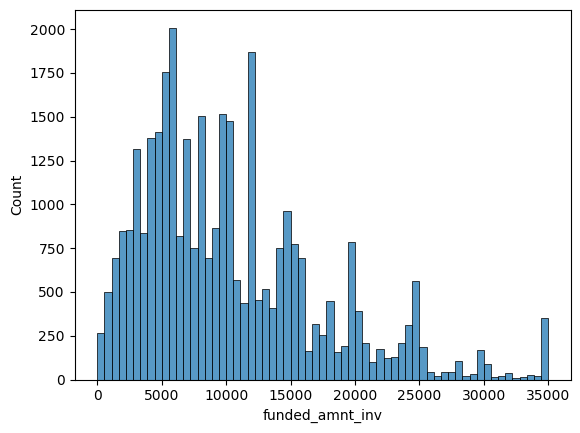

installment


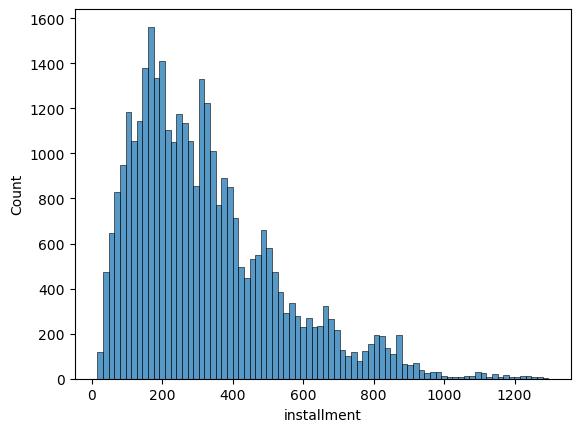

annual_inc


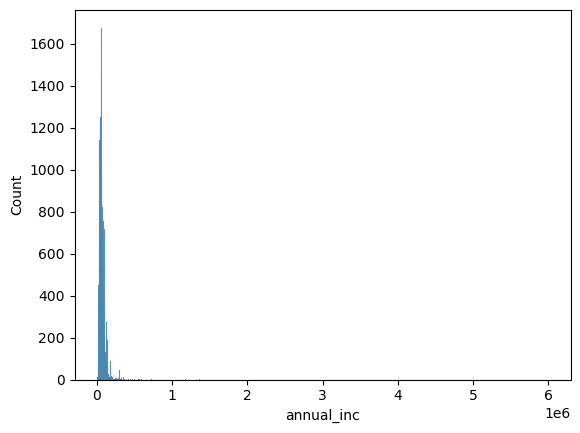

dti


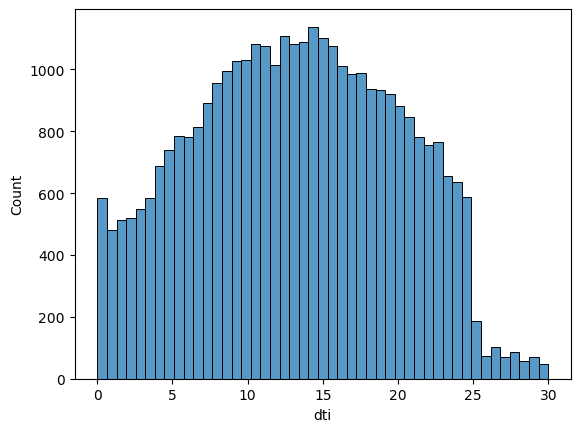

delinq_2yrs


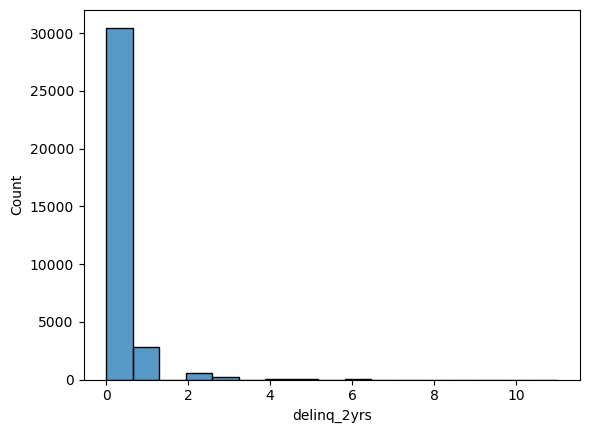

inq_last_6mths


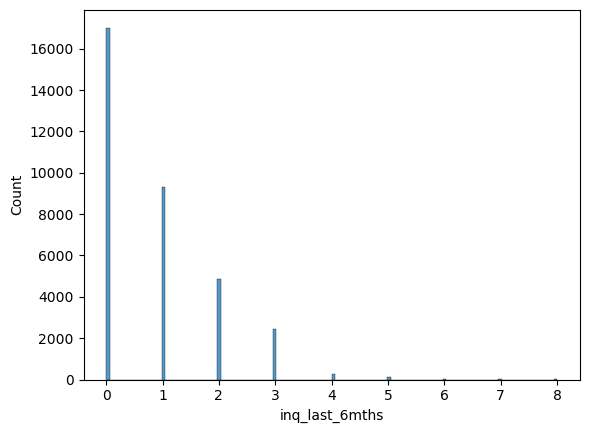

open_acc


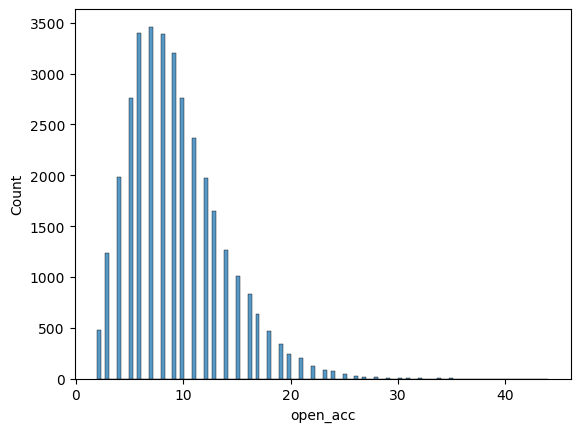

pub_rec_bankruptcies


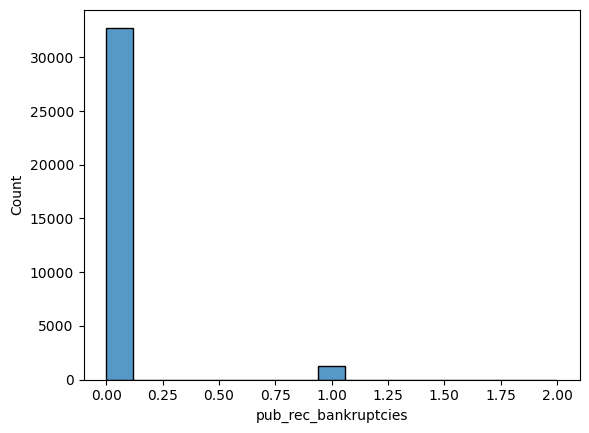

pub_rec


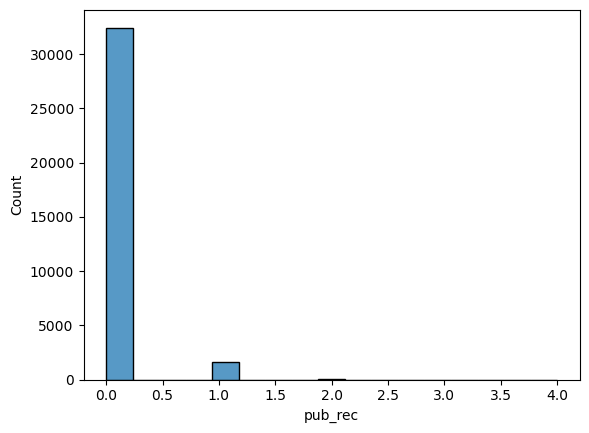

revol_bal


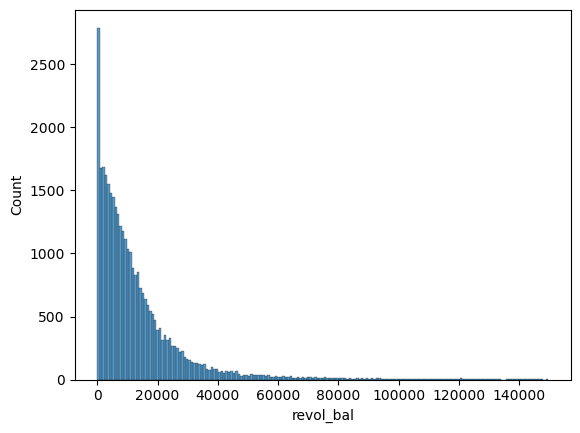

total_acc


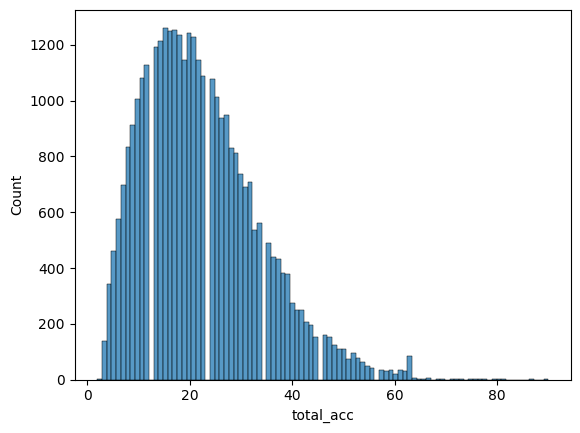

total_rec_prncp


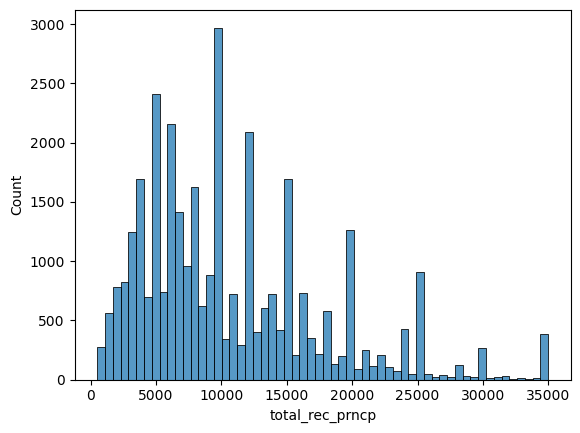

recoveries


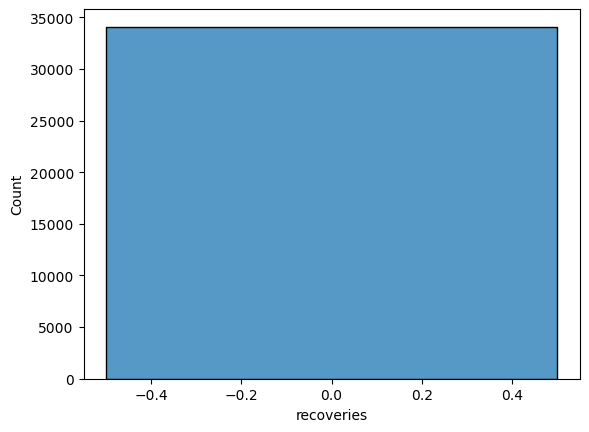

In [198]:
for i in num_col:
    print(i)
    sns.histplot(df[i])
    
    plt.show()

pub_rec_bankruptcies


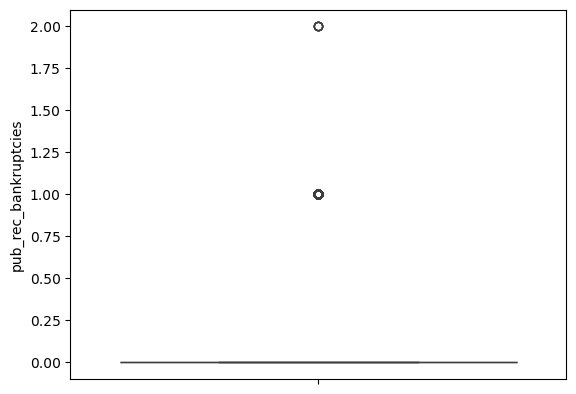

recoveries


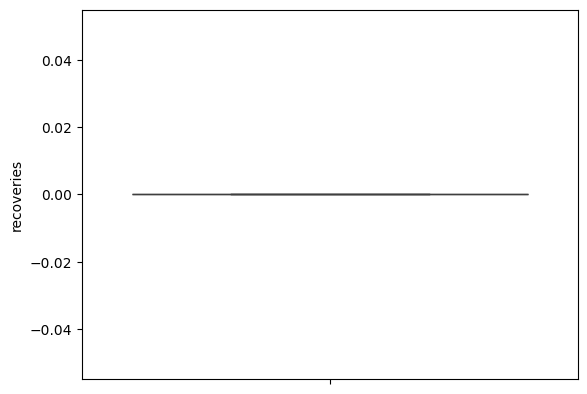

dti


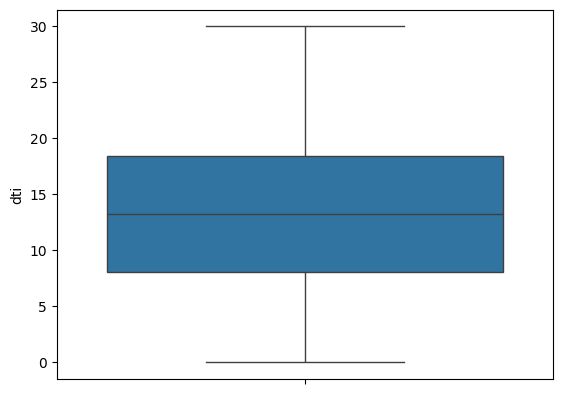

annual_inc


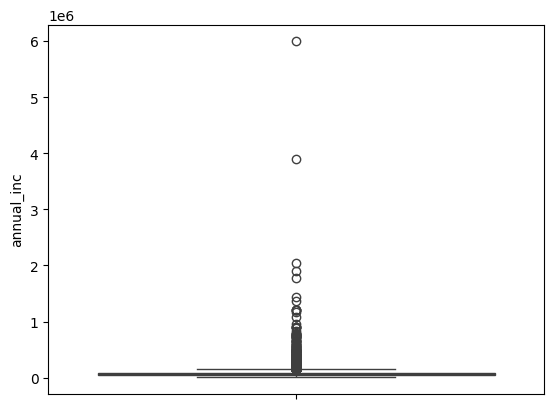

In [185]:
for i in num_col:
    print(i)
    sns.boxplot(df[i])
    plt.show()

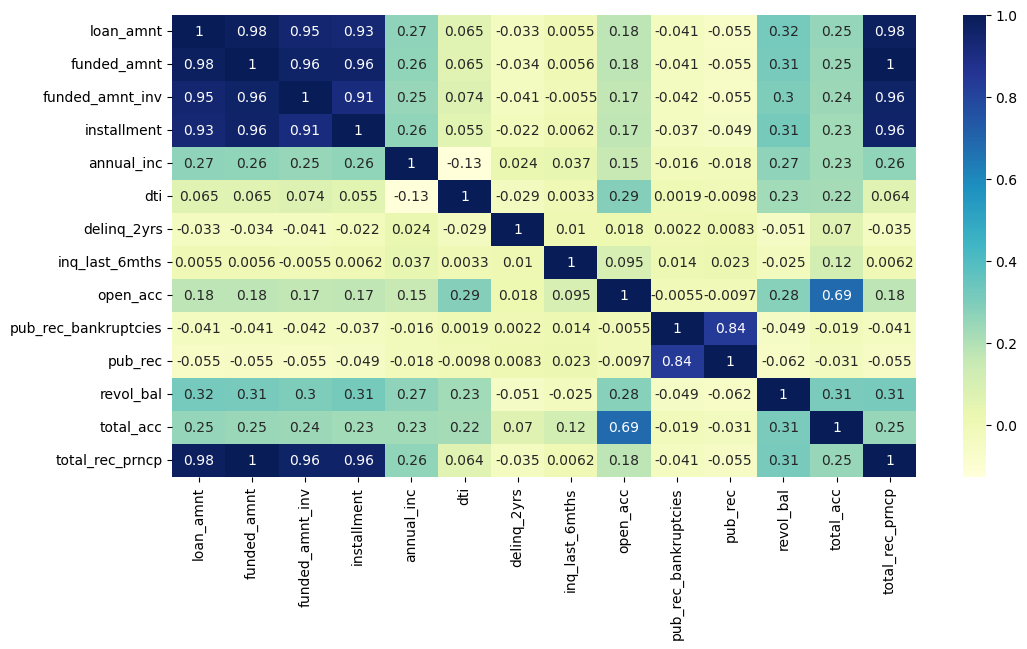

In [207]:
plt.figure(figsize=(12,6))
sns.heatmap(df[num_col].corr(),annot=True,cmap="YlGnBu")
plt.show()

In [200]:
cor = df[num_col].corr()
cor.style.background_gradient(cmap='coolwarm')

<class 'ImportError'>: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

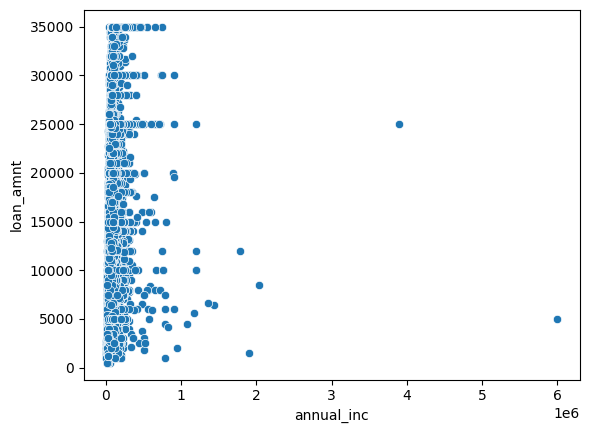

In [187]:
sns.scatterplot(y=df['loan_amnt'],x=df['annual_inc'])
plt.show()

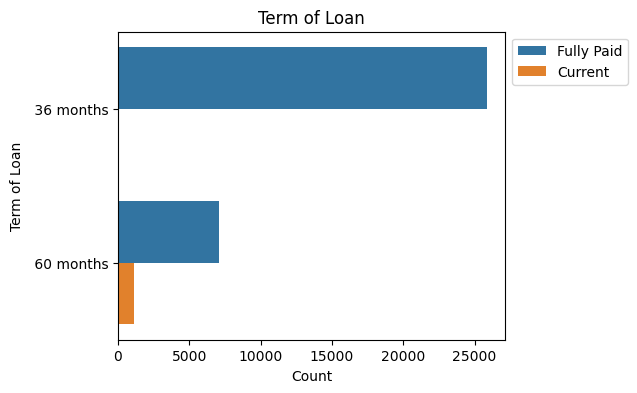

In [234]:
plt.figure(figsize=(5,4))
ax=sns.countplot(y="term",data=df,hue='loan_status')
ax.legend(bbox_to_anchor=(1,1))
ax.set(title='Term of Loan')
ax.set_xlabel('Count')
ax.set_ylabel('Term of Loan')
plt.show()